In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

# Engine Emission Dataset

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Effective Parameters

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [6]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


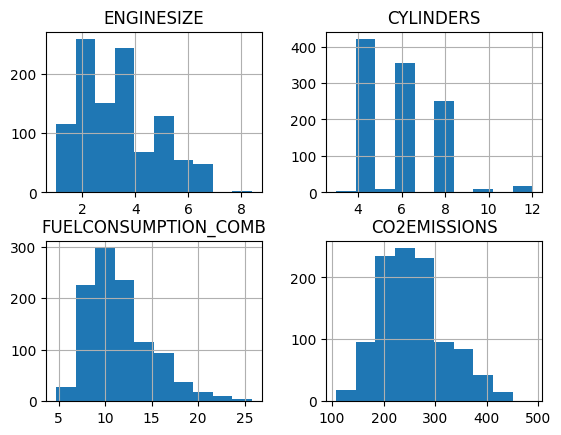

In [7]:
cdf.hist()
plt.show()

### Engine Size

Text(0.5, 0, 'Engine Size')

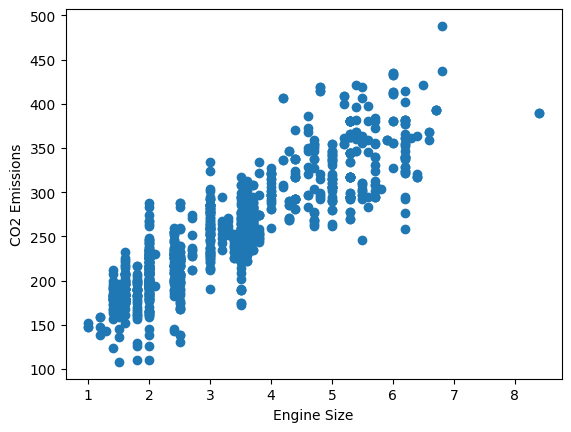

In [8]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"])
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine Size")

### Cylinders

Text(0.5, 0, 'CYLINDERS')

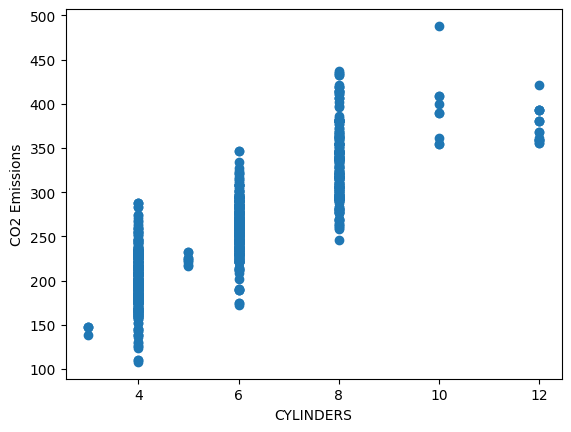

In [9]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"])
plt.ylabel("CO2 Emissions")
plt.xlabel("CYLINDERS")

### Fuel Consumption

Text(0.5, 0, 'FUELCONSUMPTION_COMB')

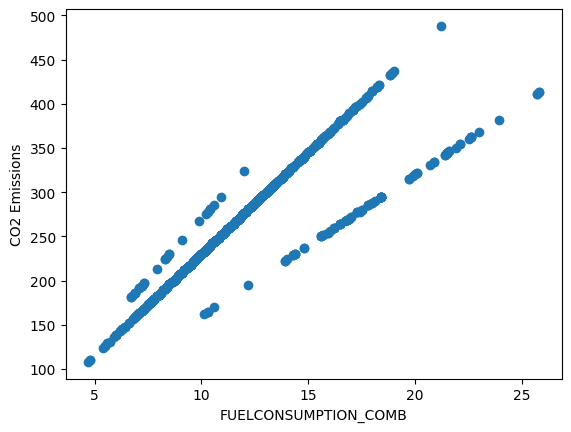

In [10]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"])
plt.ylabel("CO2 Emissions")
plt.xlabel("FUELCONSUMPTION_COMB")

## Train Test Split

In [11]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

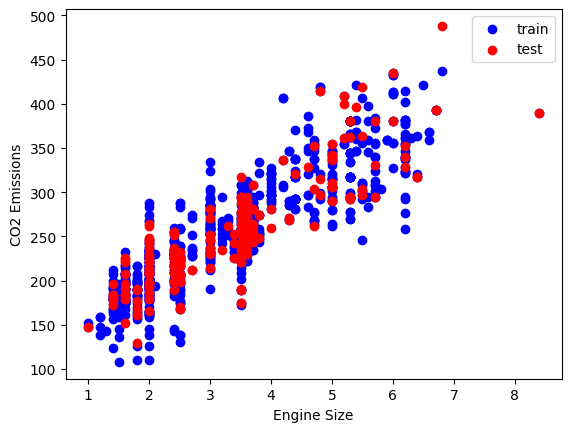

In [12]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color="blue")
plt.scatter(test["ENGINESIZE"], test["CO2EMISSIONS"], color="red")
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine Size")
plt.legend(["train", "test"])

# Simple Linear Regression

In [13]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# print:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
slope = regr.coef_[0][0]
intercept = regr.intercept_[0]

Coefficients:  [[39.27330089]]
Intercept:  [124.89056475]


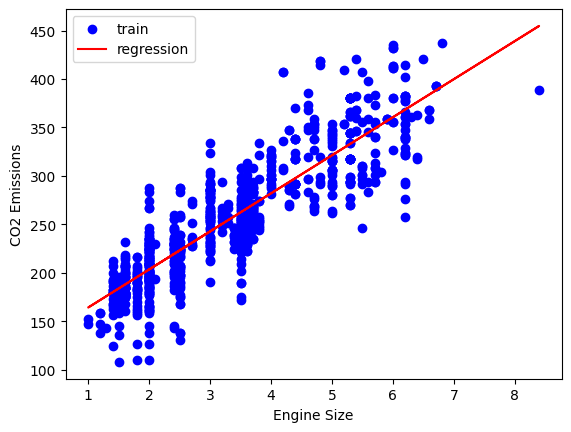

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color="blue")
ax.plot(train_x, slope * train_x + intercept, color="red")
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine Size")
plt.legend(["train", "regression"])

## Evaluation

In [15]:
from sklearn.metrics import r2_score

test_y_ = regr.predict(test_x)

# print:
print("MAE: %.2f" % np.mean(np.absolute(test_y-test_y_)))
print("MSE: %.2f" % np.mean((test_y-test_y_)**2))
print("r2_score: %.2f" % r2_score(test_y, test_y_))

MAE: 23.20
MSE: 935.56
r2_score: 0.75


# Multiple Linear Regression

In [16]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)

# print:
intercept = regr.intercept_[0]
coef = regr.coef_[0]
print("coefficints:", coef)
print("intercept:", intercept)

coefficints: [11.54381563  7.30630868  9.31536867]
intercept: 67.13458380780997


## Evaluation

In [17]:
test_x = np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x) 

print("MSR: %.2f" % np.mean((test_y_-test_y)**2))
print("r2-score: %.2f" % r2_score(test_y, test_y_))

MSR: 501.23
r2-score: 0.86


# Polynimial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x) 
test_x_poly = poly.fit_transform(test_x)

regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)

# print:
coef = regr.coef_[0]
intercept = regr.intercept_[0]
print ('Coefficients: ', coef)
print ('Intercept: ', intercept)

Coefficients:  [ 0.         53.31402077 -1.88006466]
Intercept:  102.77307787520132


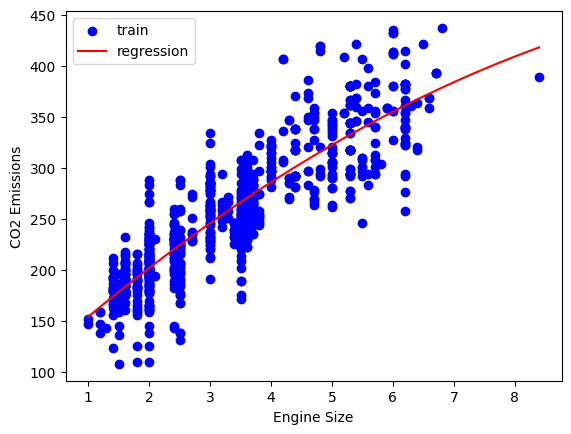

In [19]:
XX = poly.fit_transform(np.asanyarray(pd.DataFrame(np.linspace(np.min(train_x), np.max(train_x), 200))))
YY = coef @ XX.T + intercept

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color="blue")
ax.plot(np.linspace(np.min(train_x), np.max(train_x), 200), YY, color="red")
plt.ylabel("CO2 Emissions")
plt.xlabel("Engine Size")
plt.legend(["train", "regression"])

## Evaluation 

In [20]:
test_y_ = regr.predict(test_x_poly)

print("MSR: %.2f" % np.mean((test_y_-test_y)**2))
print("r2-score: %.2f" % r2_score(test_y, test_y_))

MSR: 951.39
r2-score: 0.74


# China GDP Dataset

In [21]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


Text(0.5, 1.0, 'China GDP')

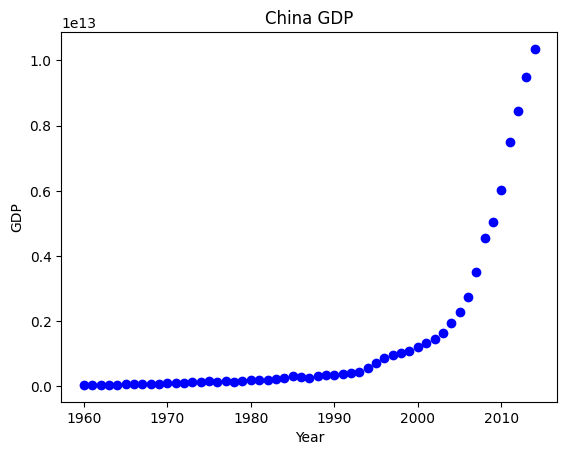

In [22]:
plt.plot(df["Year"], df["Value"], "bo")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.title("China GDP")

## Train Test Split

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

train_x = np.asanyarray(train[["Year"]])
train_y = np.asanyarray(train[["Value"]])

test_x = np.asanyarray(test[["Year"]])
test_y = np.asanyarray(test[["Value"]])

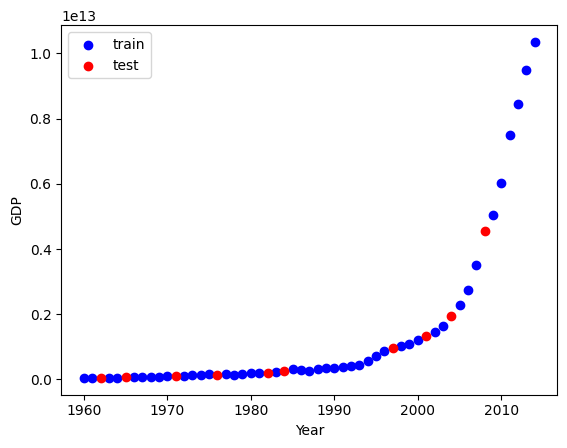

In [24]:
plt.scatter(train["Year"], train["Value"], color="blue")
plt.scatter(test["Year"], test["Value"], color="red")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend(["train", "test"])

# Nonlinear Regression

## Nonlinear Function

In [25]:
def sigmoid(x, beta1, beta2):
    
    y = 1/ (1 + np.exp(beta1 * x + beta2))
    
    return y

## Modeling

In [26]:
train_x, train_y = train["Year"].values, train["Value"].values
data_x, data_y = train_x/max(train_x), train_y/max(train_y)

from scipy.optimize import curve_fit
beta, _ = curve_fit(sigmoid, data_x, data_y)
print("beta1= %.2f,"% beta[0], "beta2=%.2f" % beta[1])

beta1= -725.22, beta2=723.20


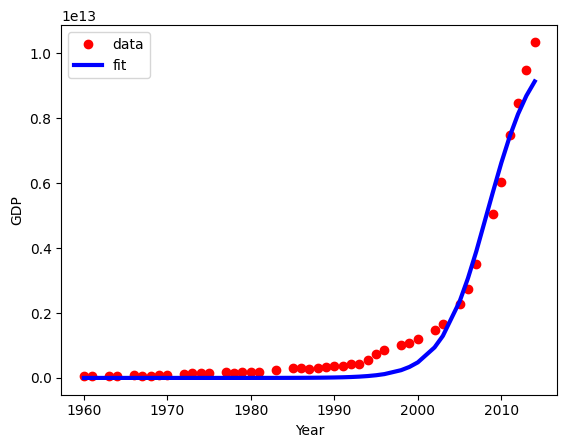

In [27]:
plt.plot(train["Year"], train["Value"], "ro", label="data")
plt.plot(train_x, max(train_y)*sigmoid(data_x, *beta), linewidth=3, color="blue", label="fit")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend(loc="best")

## Evaluation

In [28]:
test_y_ = max(train_y)*sigmoid(test_x/max(train_x), *beta)

print("MSR: %.2f" % np.mean((test_y_-test_y)**2))
print("r2-score: %.2f" % r2_score(test_y, test_y_))

MSR: 129746701289737544531968.00
r2-score: 0.93


# Gaussian Process Regression

## Noise-Free Dataset

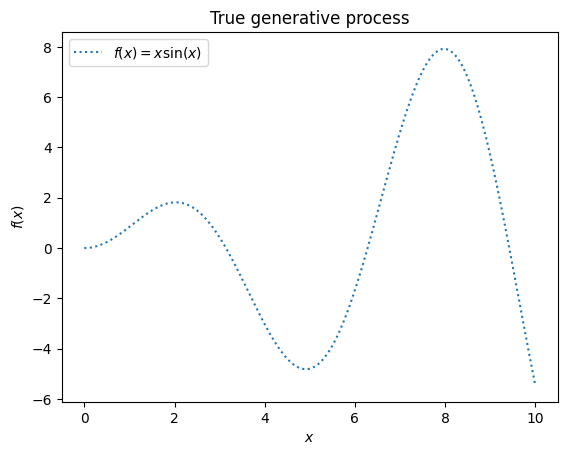

In [29]:
data_x = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
data_y = np.squeeze(data_x * np.sin(data_x))

plt.plot(data_x, data_y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [37]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(data_x.size), size=6, replace=False)

train_x = data_x[training_indices].reshape(-1, 1)
train_y = data_y[training_indices].reshape(-1, 1)

In [38]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, ConstantKernel

kernel = 1 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gaussian_process.fit(train_x, train_y)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

Text(0.5, 1.0, 'GPR for noise-free dataset')

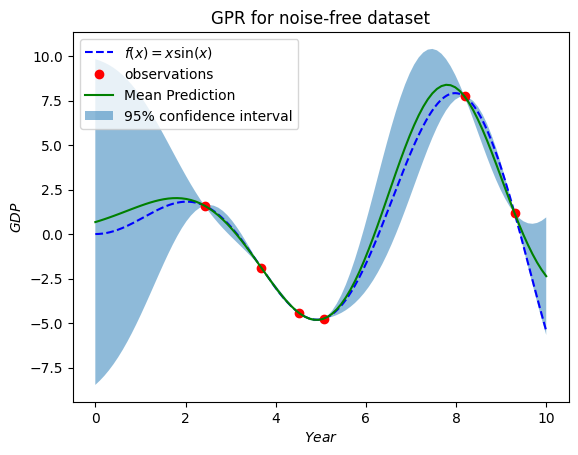

In [39]:
x = np.linspace(min(data_x), max(data_x), 100).reshape(-1, 1)
mean_predict, std_predict = gaussian_process.predict(x, return_std=True)

plt.plot(data_x, data_y, "b--", markersize=2, label=r"$f(x) = x \sin(x)$")
plt.plot(train_x.reshape(train_x.size), train_y.reshape(train_x.size), "ro", label="observations")
plt.plot(x, mean_predict, "g-", label="Mean Prediction")
plt.fill_between(
    x.ravel(),
    mean_predict - 1.96 * std_predict,  
    mean_predict + 1.96 * std_predict,  
    alpha=0.5,
    label="95% confidence interval"
)
plt.legend(loc="best")
plt.xlabel("$Year$")
plt.ylabel("$GDP$")
plt.title("GPR for noise-free dataset")

### Evaluation

In [40]:
test_indices = rng.choice(np.arange(data_x.size), size=6, replace=False)

test_x = data_x[test_indices]
test_y = data_y[test_indices]
test_y_ = gaussian_process.predict(test_x)

print("MSR: %.2f" % np.mean((test_y_-test_y)**2))
print("r2-score: %.2f" % r2_score(test_y, test_y_))

MSR: 0.33
r2-score: 0.96


## Noisy Dataset

In [41]:
noise_std = 0.75
train_y_noisy = train_y + rng.normal(loc=0, scale=noise_std, size=train_y.shape).reshape(-1, 1)

kernel = 1 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)

gaussian_process.fit(train_x, train_y_noisy)
gaussian_process.kernel_

4.68**2 * RBF(length_scale=1.29)

Text(0.5, 1.0, 'GPR for noisy dataset')

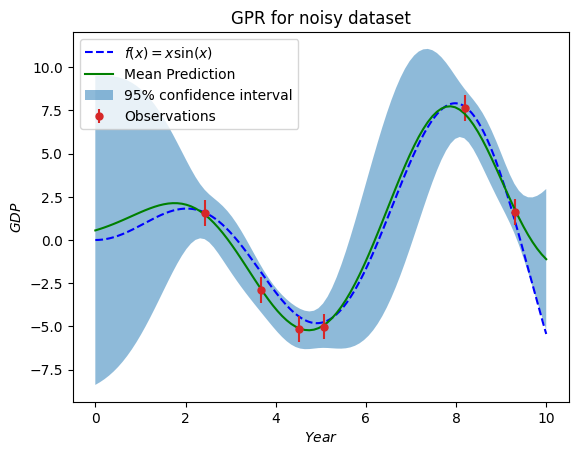

In [42]:
x = np.linspace(min(data_x), max(data_x), 100).reshape(-1, 1)
mean_predict, std_predict = gaussian_process.predict(x, return_std=True)

plt.plot(data_x, data_y, "b--", markersize=2, label=r"$f(x) = x \sin(x)$")
plt.errorbar(
    train_x.reshape(train_x.size),
    train_y_noisy.reshape(train_x.size),
    noise_std,
    linestyle="None",
    color="tab:red",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(x, mean_predict, "g-", label="Mean Prediction")
plt.fill_between(
    x.ravel(),
    mean_predict - 1.96 * std_predict,  
    mean_predict + 1.96 * std_predict,  
    alpha=0.5,
    label="95% confidence interval"
)
plt.legend(loc="best")
plt.xlabel("$Year$")
plt.ylabel("$GDP$")
plt.title("GPR for noisy dataset")

### Evaluation

In [43]:
test_indices = rng.choice(np.arange(data_x.size), size=6, replace=False)

test_x = data_x[test_indices]
test_y = data_y[test_indices]
test_y_ = gaussian_process.predict(test_x)

print("MSR: %.2f" % np.mean((test_y_-test_y)**2))
print("r2-score: %.2f" % r2_score(test_y, test_y_))

MSR: 0.18
r2-score: 0.97
